In [18]:
from statistics import kde
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import os
import pandas as pd

# Load the wine datasets (Both red and white)
red_path = r"C:/Users/DELL/OneDrive/Desktop/DESKTOP STUFF/Aptech/Python/Data Science/Wine Quality/winequality-red.csv"
white_path = r"C:/Users/DELL/OneDrive/Desktop/DESKTOP STUFF/Aptech/Python/Data Science/Wine Quality/winequality-white.csv"

if not os.path.exists(red_path):
	raise FileNotFoundError(f"Red wine dataset not found at: {red_path}\nPlease check the path and make sure the file exists.")
if not os.path.exists(white_path):
	raise FileNotFoundError(f"White wine dataset not found at: {white_path}\nPlease check the path and make sure the file exists.")

df_red = pd.read_csv(red_path, sep=';')
df_white = pd.read_csv(white_path, sep=';')

# Add a 'type' column to distinguish between red and white wines
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combine the datasets
df = pd.concat([df_red, df_white], ignore_index=True)

# Display the first few rows of the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.shape)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

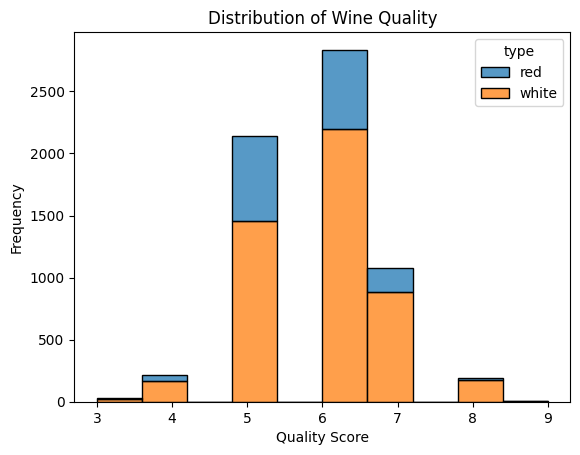

In [ ]:
# Histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Make sure df is defined by running cell 1 before this cell.
sns.histplot(data=df, x="quality", hue="type", multiple="stack", bins=10) # pyright: ignore[reportUndefinedVariable]
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()

# The distribution shows that most wines are rated between 5 and 7, with white wines generally receiving higher quality scores than red wines.
# This suggests that white wines in this dataset are perceived to be of better quality compared to red wines.
# There are fewer wines rated at the extreme ends (3, 4, 8), indicating that very low and very high-quality wines are less common in this dataset.

# Overall, the quality ratings are concentrated in the mid-range, with a noticeable difference in quality perception between red and white wines.

# The distribution is slightly skewed towards higher quality scores, especially for white wines,
# .... which may indicate a preference or bias in the dataset towards better-quality white wines.

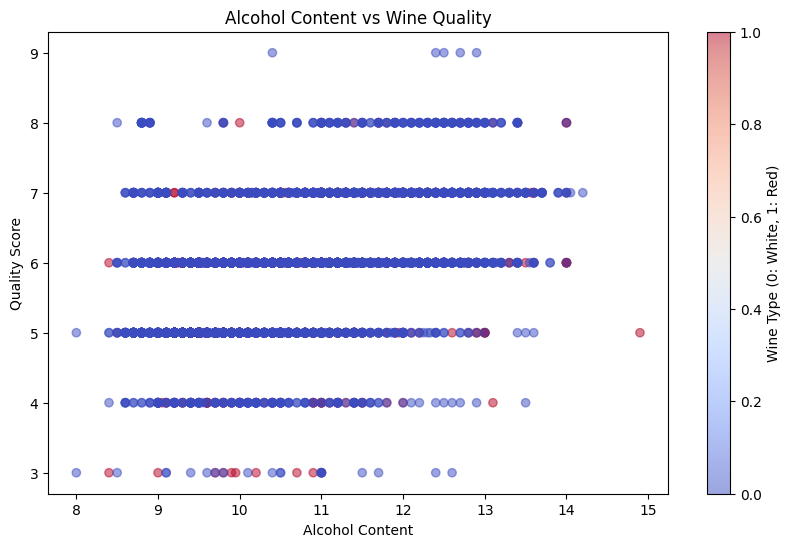

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot Diagram (Alcohol vs Quality)
plt.figure(figsize=(10,6))
plt.scatter(df['alcohol'], df['quality'], alpha=0.5, c=(df['type'] == 'red').astype(int), cmap='coolwarm') # pyright: ignore[reportUndefinedVariable]
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality Score')
plt.colorbar(label='Wine Type (0: White, 1: Red)')
plt.show()

# The scatter plot indicates a positive correlation between alcohol content and wine quality.
# Higher alcohol content tends to be associated with higher quality scores.
# Additionally, white wines (represented by one color) generally have higher quality scores compared to red wines (represented by another color).
# This suggests that, in this dataset, white wines are perceived to be of better quality than red wines, especially at higher alcohol levels.

# White wines are indicated with the color corresponding to 0, while red wines are indicated with the color corresponding to 1.

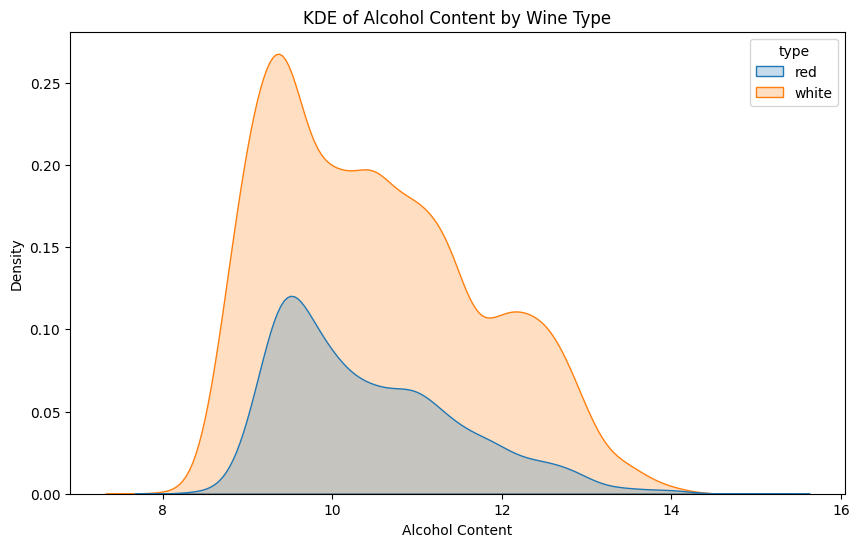

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency Distribution (KDE of Alcohol Content)
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="alcohol", hue="type", fill=True) # pyright: ignore[reportUndefinedVariable]
plt.title('KDE of Alcohol Content by Wine Type')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.show()

# The KDE plot shows the distribution of alcohol content for both red and white wines.

# As we can see, white wines tend to have a higher alcohol content compared to red wines.
# The peak of the white wine distribution is around 10-12% alcohol, while the peak for red wines is around 9-11% alcohol.

# This indicates that white wines in this dataset generally have a higher alcohol content than red wines.
# Additionally, the distribution for white wines is more concentrated, suggesting less variability in alcohol content compared to red wines.

# Then again, the KDE plot also indicates that the density of alcohol content is higher for white wines,...
# ... which may contribute to their generally higher quality ratings observed in the previous analyses.
# Than red wines which have a lower density of alcohol content.
# This could imply that alcohol content is a significant factor in the perceived quality of wines, particularly for white wines... 

# In contrast, red wines show a broader range of alcohol content, indicating more variability in this feature among red wines.
# Also, the overlap between the two distributions suggests that there are some red wines with alcohol content similar to white wines, but they are less common.
# It's also noteworthy that both types of wine have a tail extending towards higher alcohol content, indicating the presence of some wines with very high alcohol levels in both categories.

#

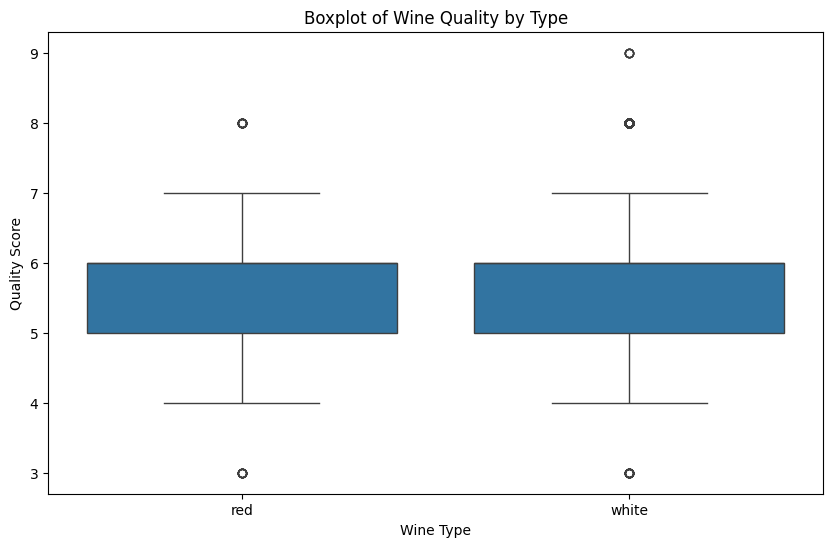

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot (Quality by Wine Type)
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='quality', data=df) # pyright: ignore[reportUndefinedVariable]
plt.title('Boxplot of Wine Quality by Type')
plt.xlabel('Wine Type')
plt.ylabel('Quality Score')
plt.show()

# The boxplot shows that red wines generally have a higher median quality score compared to white wines.
# Additionally, red wines exhibit a wider range of quality scores, indicating more variability in quality.
# White wines tend to cluster around a slightly lower median quality score with less variability.
# This suggests that, on average, red wines are rated higher in quality than white wines in this dataset.

# As for the outliers, both wine types have some outliers in their quality scores...,
# ... but red wines have a few more extreme values on the higher end of the quality scale.

# This could indicate that while red wines generally have higher quality..., 
# ... there are also some exceptional red wines that stand out significantly in terms of quality.
# Overall, the boxplot provides insights into the distribution and variability of wine quality between red and white wines.
# And there are major similarities in the quality of both types of wine.

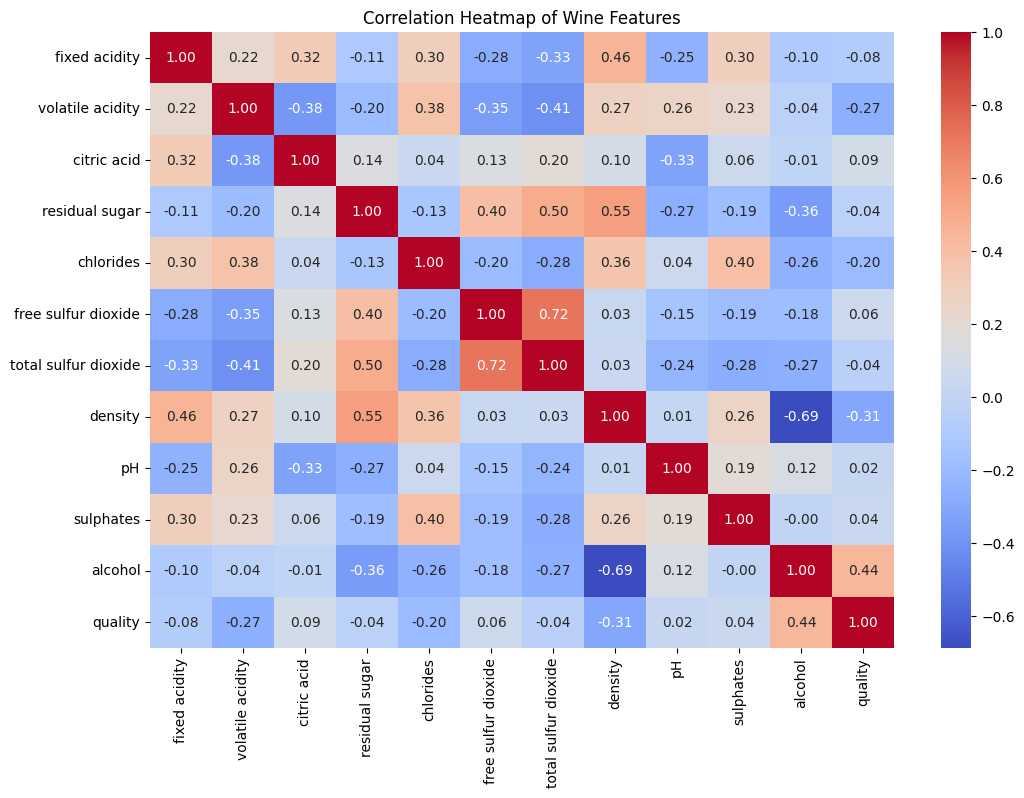

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df.drop('type', axis=1).corr() # pyright: ignore[reportUndefinedVariable]
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Features')
plt.show()

# The correlation heatmap shows the relationships between different features in the wine dataset.

# Features with high positive correlation (close to 1) move together, while those with high negative correlation (close to -1) move inversely.
# For example, alcohol content has a positive correlation with quality,...
# .... indicating that higher alcohol content is often associated with better quality wines.
# Conversely, density has a negative correlation with quality, suggesting that denser wines may be perceived as lower quality

# As for the rest of the features, they show varying degrees of correlation with quality and with each other,....
# .... which can provide insights into how different chemical properties of wine influence its overall quality rating.

<Figure size 1200x1000 with 0 Axes>

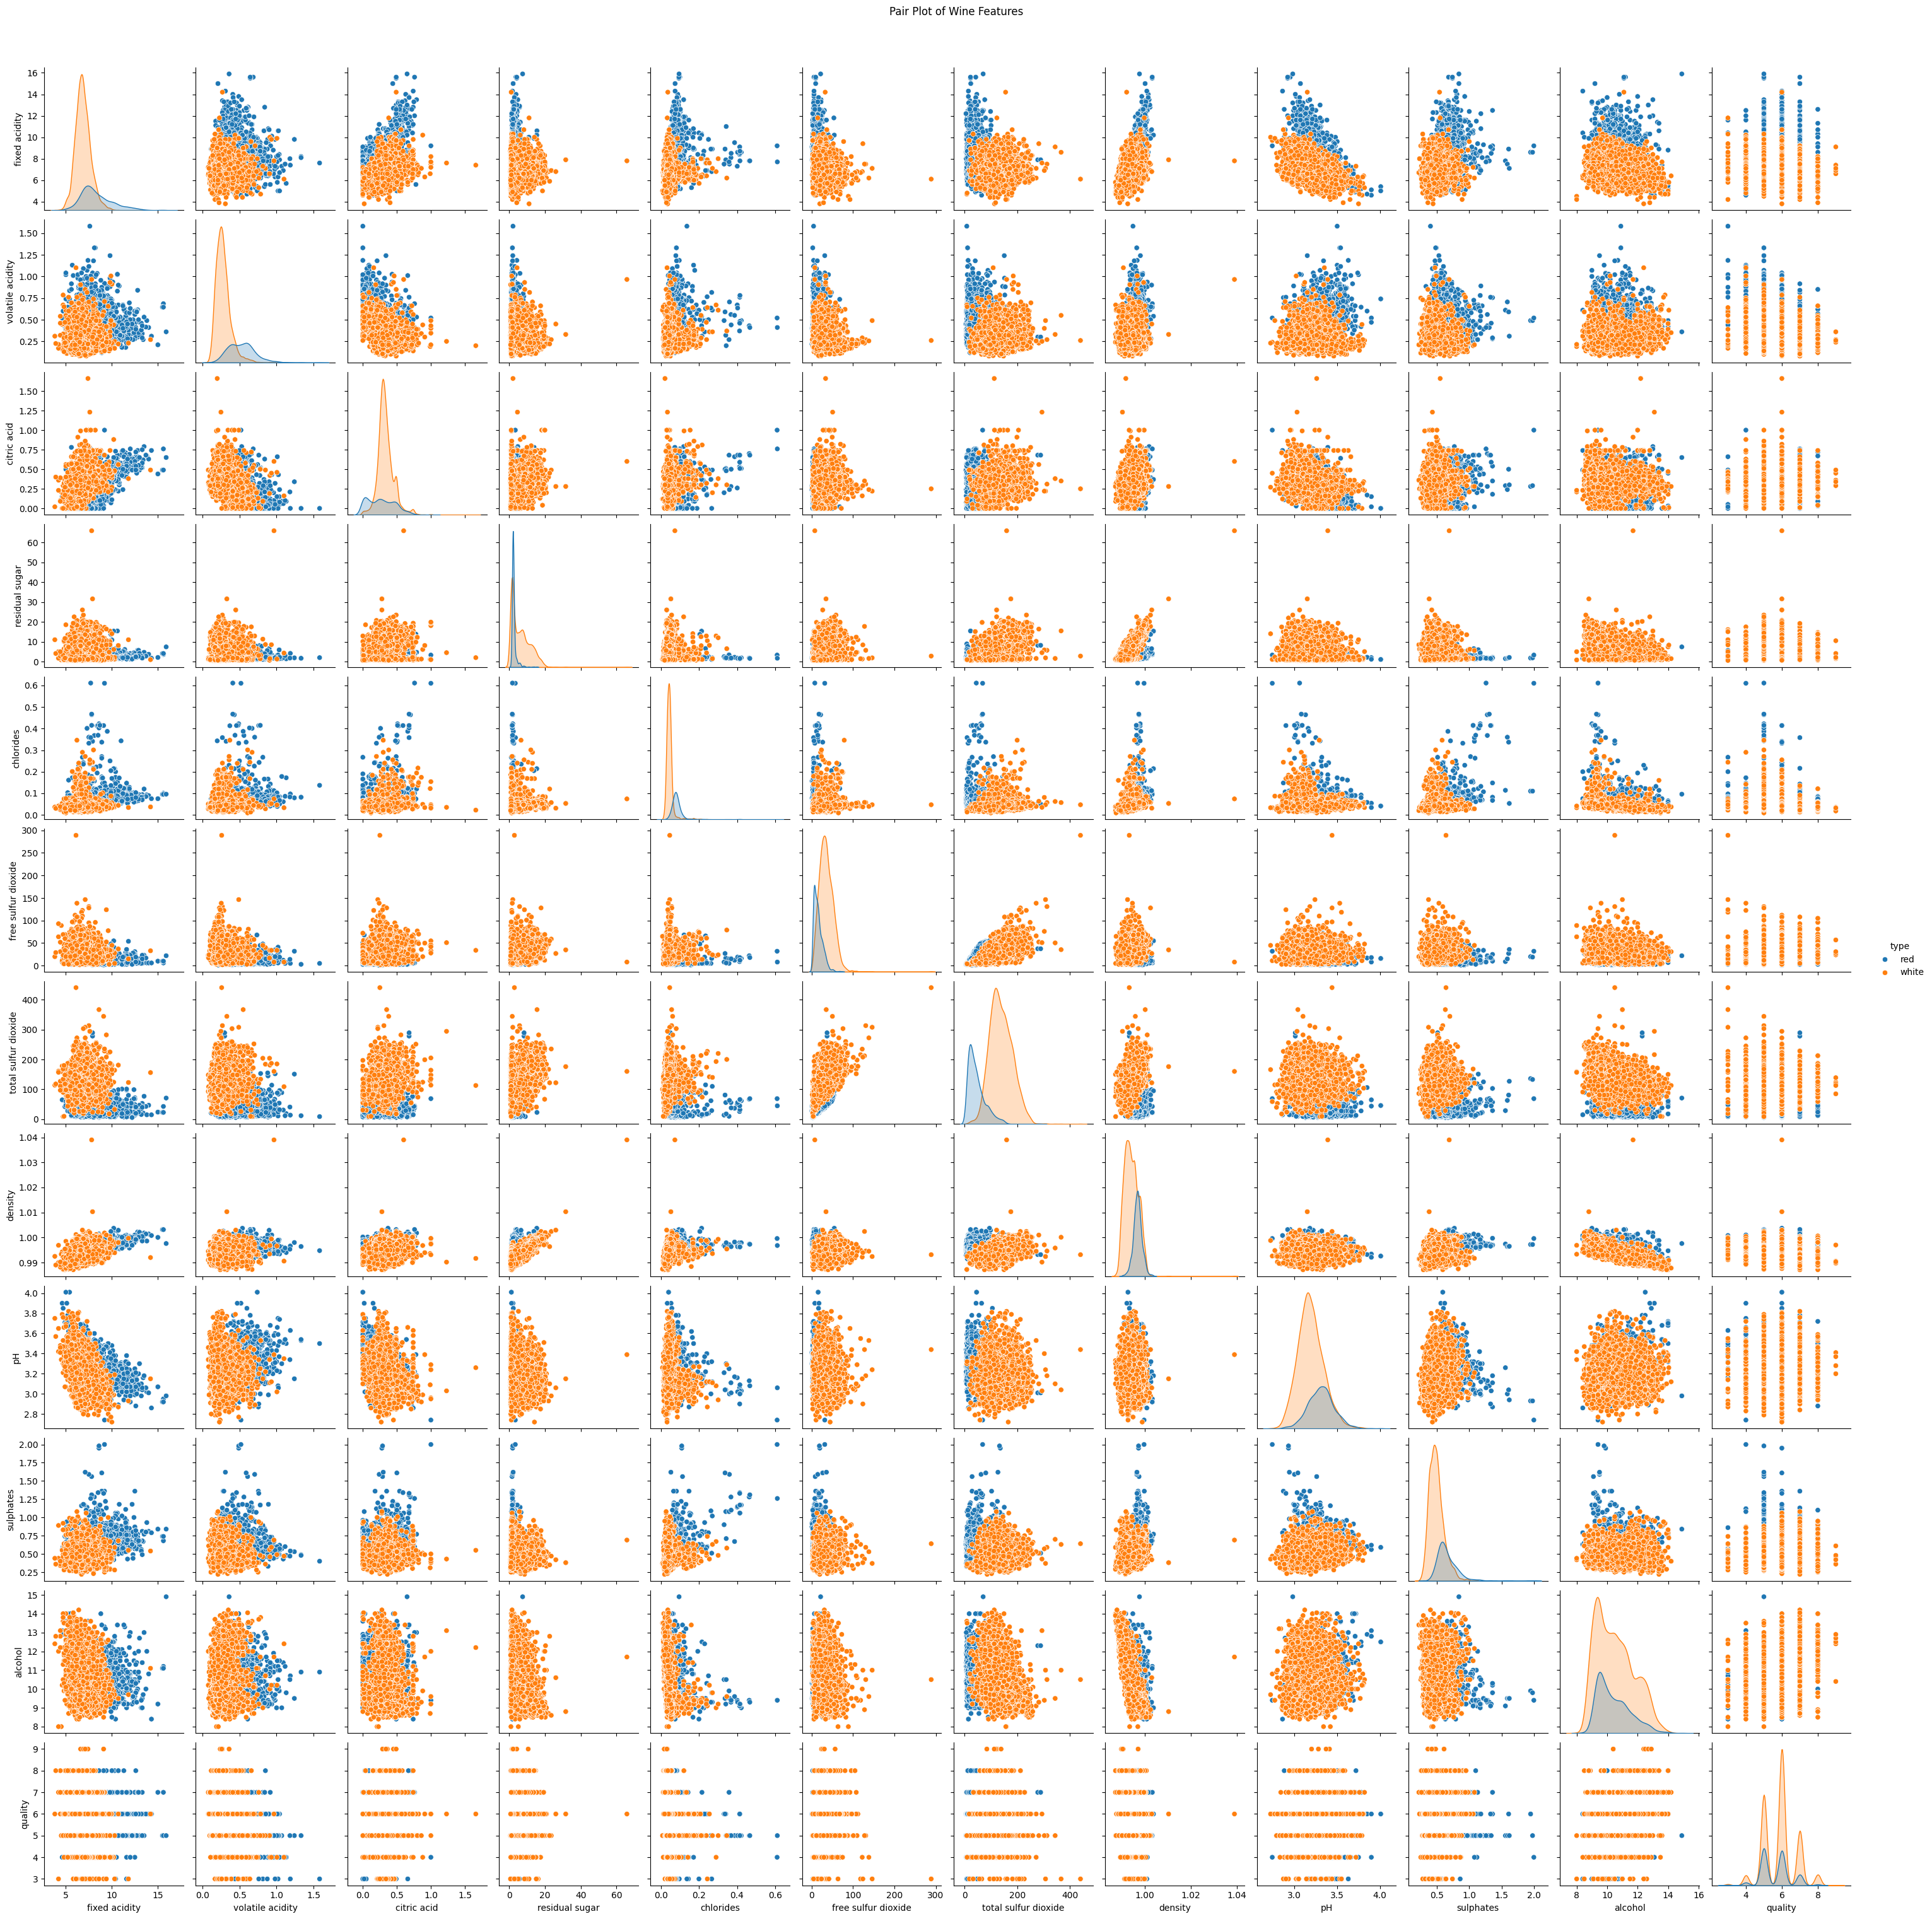

In [ ]:
from statistics import kde
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Pair Plot to see relationships between features
plt.figure(figsize=(12,10))
sns.pairplot(df, hue='type', diag_kind='kde')
plt.suptitle('Pair Plot of Wine Features', y=1.02)
plt.show()

# From this MASSIVE pair plot, we can observe several relationships between the features of the wine dataset.

# Notably, there are some clear correlations between certain features, such as alcohol content and quality.
# Higher alcohol content tends to be associated with higher quality scores, which aligns with our previous scatter plot analysis.

# Additionally, we can see that white wines (represented by a orange-ish color) generally have higher quality....
# scores compared to red wines (represented by a blue-ish color), especially at higher alcohol levels
# This suggests that, in this dataset, white wines are perceived to be of better quality than red wines.

# White wines are indicated with the color corresponding to 0, while red wines are indicated with the color corresponding to 1.

# Furthermore, the pair plot reveals that certain features, such as volatile acidity and citric acid,....
# ... have a negative correlation with quality, indicating that higher levels of these acids may be associated with lower quality wines.

# Overall, the pair plot provides a comprehensive overview of the relationships between different features in the wine dataset,
# ... highlighting key correlations and differences between red and white wines.

# Also, the diagonal plots show the distribution of each feature, which can help identify any skewness or outliers in the data.
# And we can see that some features, such as alcohol content and pH, have a more normal distribution,... 
# ... while others, like residual sugar and chlorides, are more skewed or have outliers.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Baseline Regression Model
# For this, Split into train/test; train Linear Regression or Random Forest; evaluate using RMSE, MAE, R².
X = df.drop(['quality', 'type'], axis=1) # pyright: ignore[reportUndefinedVariable]
y = df['quality'] # pyright: ignore[reportUndefinedVariable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# This baseline regression model using Random Forest Regressor provides a good starting point for predicting wine quality based on its features.

# The evaluation metrics indicate the model's performance on the test set.

# A lower Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) suggest that the model's predictions are relatively close to the actual quality scores.
# The R² Score indicates the proportion of variance in the quality scores that can be explained by the model.
# An R² Score closer to 1 would indicate a better fit, while a score closer to 0 would suggest that the model does not explain much of the variance.
# Further tuning and feature engineering could improve the model's performance. enhance the model's predictive capabilities.

Mean Absolute Error: 0.33120769230769226
Mean Squared Error: 0.21596099999999996
Root Mean Squared Error: 0.46471604233122826
R² Score: 0.7075865525131717


In [ ]:
from statistics import kde
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Model (Quality as Good (>=7) vs Bad (<7))
# We need to train a classification model to predict if a wine is good or bad based on its features.
df['quality_label'] = (df['quality'] >= 7).astype(int) # pyright: ignore[reportUndefinedVariable]
X = df.drop(['quality', 'quality_label', 'type'], axis=1) # pyright: ignore[reportUndefinedVariable]
y = df['quality_label'] # pyright: ignore[reportUndefinedVariable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# And finally, this classification model using Random Forest Classifier helps to categorize wines as good or bad based on their features.

# The evaluation metrics indicate the model's performance on the test set.
# A higher precision and recall indicate that the model is effective at identifying good quality wines (quality >= 7).
# The confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
# The ROC AUC Score indicates the model's ability to distinguish between good and bad wines, with a score closer to 1 indicating better performance.
# Further tuning and feature engineering could improve the model's performance and enhance the model's predictive capabilities.

# Mind you 0 and 1 are just numerical representations of the two wine types (White and Red) respectively.


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1048
           1       0.79      0.57      0.66       252

    accuracy                           0.89      1300
   macro avg       0.84      0.77      0.80      1300
weighted avg       0.88      0.89      0.88      1300

[[1009   39]
 [ 109  143]]
ROC AUC Score: 0.7651232885011511
